# Antibody Benchmark

This data is a subset of the Docking Benchmark5.5 containing only Antibody-Antigen Complexes.

The excel sheet is downloaded from https://piercelab.ibbr.umd.edu/antibody_benchmark/antibody_benchmark_cases.xlsx (Downloaded 30.04.2022)

The PDB Files are downloaded from their GitHub Repository: https://github.com/piercelab/antibody_benchmark (30.04.2022)

In [1]:
import pandas as pd
import yaml
import os
import seaborn as sns

In [2]:
from abag_affinity.utils.config import read_config, get_resources_paths

In [3]:
config = read_config("../../config.yaml")

summary_path = os.path.join(config["DATASETS"]["path"], config["DATASETS"]["AntibodyBenchmark"]["folder_path"], config["DATASETS"]["AntibodyBenchmark"]["summary"])

In [4]:
summary_df = pd.read_csv(summary_path)
print("There are {} ab-ag cases".format( len(summary_df["pdb"].unique())))


There are 42 ab-ag cases


<AxesSubplot:xlabel='-log(Kd(M))', ylabel='Percent'>

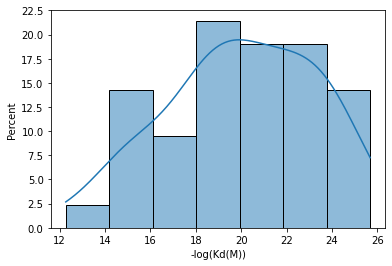

In [5]:
import numpy as np
summary_df["Kd (M)"] = summary_df["Kd (nM)"].apply(lambda x: x / (10**9))
summary_df["-log(Kd(M))"] = summary_df["Kd (M)"].apply(lambda x: -np.log(x))
sns.histplot(summary_df, x="-log(Kd(M))", stat="percent", kde=True)

<AxesSubplot:xlabel='delta G', ylabel='Percent'>

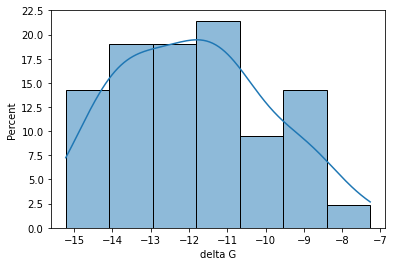

In [6]:
summary_df["temperature_kelvin"] = 25 + 273.15
gas_constant =  8.31446261815324 # 0.0821

def calc_delta_g(row):
    delta_g = -1 * gas_constant * row["temperature_kelvin"] * np.log(1 / row["Kd (M)"])
    return delta_g / 4184 # convert to kcal

summary_df["delta G"] = summary_df.apply(calc_delta_g, axis=1)
sns.histplot(summary_df, x="delta G", stat="percent", kde=True)

### Remove all entires without binding affinity

In [7]:
summary_df = summary_df.replace(" ", None)
summary_df = summary_df[summary_df["delta_g"].notnull() & summary_df["-log(Kd)"].notnull()]

print("There are {} ab-ag cases with affinity".format(len(summary_df)))

There are 42 ab-ag cases with affinity


In [8]:
summary_df = summary_df.reset_index(drop=True)

In [9]:
summary_df[["-log(Kd)","delta_g"]].corr()

,-log(Kd),delta_g
-log(Kd),1.000000,-0.992646
delta_g,-0.992646,1.000000


<AxesSubplot:xlabel='-log(Kd)', ylabel='Percent'>

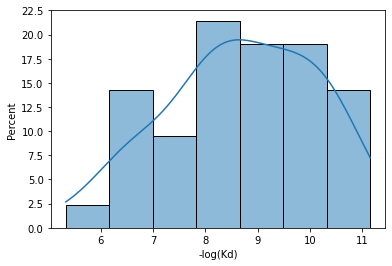

In [10]:
sns.histplot(summary_df, x="-log(Kd)", stat="percent", kde=True)

In [11]:
summary_df.describe()

,-log(Kd),Kd (nM),delta_g,validation,Kd (M),-log(Kd(M)),temperature_kelvin,delta G
count,42.000000,42.000000,42.000000,42.0,4.200000e+01,42.000000,4.200000e+01,42.000000
mean,8.686739,160.372931,-11.911667,0.0,1.603729e-07,20.001956,2.981500e+02,-11.850858
std,1.428948,727.775512,1.978008,0.0,7.277755e-07,3.290274,2.301298e-13,1.949438
min,5.327902,0.007000,-15.220000,0.0,7.000000e-12,12.267948,2.981500e+02,-15.218042
25%,7.790935,0.135000,-13.542500,0.0,1.350000e-10,17.939290,2.981500e+02,-13.465827
50%,8.735240,1.840000,-11.860000,0.0,1.840000e-09,20.113633,2.981500e+02,-11.917025
75%,9.870520,16.750000,-10.912500,0.0,1.675000e-08,22.727711,2.981500e+02,-10.628760
max,11.154902,4700.000000,-7.270000,0.0,4.700000e-06,25.685111,2.981500e+02,-7.268575
